### https://scicomp.stackexchange.com/questions/21712/ground-state-from-the-schroedinger-equation-with-a-central-potential-what-happen

In [2]:
using Plots
using LinearAlgebra
gr()

Plots.GRBackend()

In [34]:
# three-point finite-difference rep of Laplacian
function secondDeriv(N, deltaX)
    temp1 = ones(N - 1)
    A = diagm(1 => temp1)
    B = diagm(-1 => temp1)
    C = -2 * diagm(0 => ones(N))
    D = A + B + C
    D = @. (1 / (deltaX^2)) * D
    D
end

secondDeriv (generic function with 1 method)

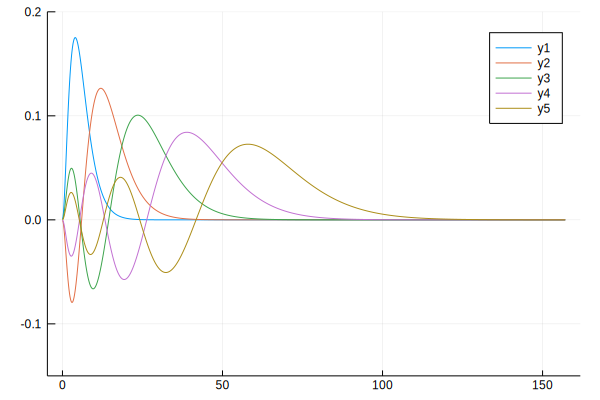

In [55]:
L = 50*pi
N = 1001
xa = 0
xb = L
x = collect(range(xa, xb, length = N))
dx = x[2] - x[1]

l = 1
k = 0

Lap = secondDeriv(N, dx)
#T = -0.5*diags([-2., 1., 1.], [0, -1, 1], shape=(N, N))/dx^2
T = -0.5*Lap

U_vec = @. 0.5*l*(l + 1)/(x^2 + 1e-6) - 1/(abs(x) + 1e-6)
U = diagm(0 => U_vec)
#U = diagm([U_vec], [0])


H = T + U

#vals, vecs = eigsh(H, which='SA')
vals, vecs = eigen(H)

perm = sortperm(vals) # re-order eigenvalues according to increasing energies e
vals = vals[perm]

gr(show = :ijulia)
vec = vecs[:, 1]
mag = sqrt(dot(vecs[:, 1],vecs[:, 1]))
vec = vec/mag
plot(x, vec, ylims = (-0.15, 0.2))
sleep(1)
for k in 2:5
    vec = vecs[:, k]
    mag = sqrt(dot(vecs[:, k],vecs[:, k]))
    vec = vec/mag
    display(plot!(x, vec))
    sleep(1)
end


In [ ]:
#=

[-0.125106 -0.0556   -0.031272 -0.020012 -0.013896 -0.010209]
[-0.125    -0.055556 -0.03125  -0.02     -0.013889 -0.010204]

plt.xlabel(r"$x$")
plt.ylabel(r"$\psi(x)$")
plt.xlim(xa, xb)

    
#k = k[perm] 

#[e k]

#print(round(vals, 6))

print(np.round(vals, 6))
print(np.round([-1/(2*n**2) for n in range(k + l + 1, k + l + 7)], 6))

for k in range(5):
    vec = vecs[:, k]
    mag = np.sqrt(np.dot(vecs[:, k],vecs[:, k]))
    vec = vec/mag
    plt.plot(x, vec, label=r"$n=%i$"% (k+1))

plt.xlabel(r"$x$")
plt.ylabel(r"$\psi(x)$")
plt.xlim(xa, xb)
=#

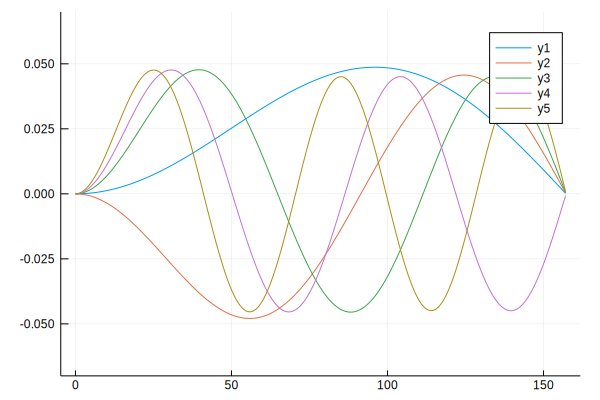

In [57]:
L = 50*pi
N = 1001
xa = 0
xb = L
x = collect(range(xa, xb, length = N))
dx = x[2] - x[1]

#T = -0.5*diags([-2., 1., 1.], [0, -1, 1], shape=(N, N))/dx**2
Lap = secondDeriv(N, dx)
T = -0.5*Lap

#U_vec = 1/(x**2 + 1e-6)
#U = diags([U_vec], [0])
U_vec = @. 1/(x^2 + 1e-6)
U = diagm(0 => U_vec)

H = T + U

#vals, vecs = eigsh(H, which='SA')
vals, vecs = eigen(H)
perm = sortperm(vals) # re-order eigenvalues according to increasing energies e
vals = vals[perm]

gr(show = :ijulia)
vec = vecs[:, 1]
mag = sqrt(dot(vecs[:, 1],vecs[:, 1]))
vec = vec/mag
plot(x, vec, ylims = (-0.07, 0.07))
sleep(1)

for k in 2:5
    vec = vecs[:, k]
    mag = sqrt(dot(vecs[:, k],vecs[:, k]))
    vec = vec/mag
    display(plot!(x, vec))
    sleep(1)
end


#=
print(np.round(vals, 6))

for k in range(5):
    vec = vecs[:, k]
    mag = np.sqrt(np.dot(vecs[:, k],vecs[:, k]))
    vec = vec/mag
    plt.plot(x, vec, label=r"$n=%i$"% (k+1))

plt.xlabel(r"$x$")
plt.ylabel(r"$\psi(x)$")
plt.xlim(xa, xb)
plt.legend()
plt.savefig("eigenvecs.png", dpi=600)  
plt.show()

[ 0.000408  0.001207  0.002405  0.004001  0.005997  0.008392]
=#